In [655]:
# Code from D:\MMD_Cache\WorkBench_2024\Processing_and_Code\py_Code\py_code_for_SIT\Q1_2024\March
# 07/15/2024  Dealing with the single file case first 
#             Saved audio time series figure to file
#             modified to perform Welch periodogram on data, results in frquency spectrum
#             incorporated better peak handling  - via introduction of Pandas dataframes for the peaks
#             Was able to sort the peaks found, by strength or by freq position
#             Saved the sorted peaks to an excel spreadsheet
# 07/16/2024
#             Put in code to check that given directory exists and if not then create it             
#             Wrote file information to a text file (saved it)


In [1]:
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import wavfile  # Not wavefile as is given in the .py file from Stevens
import wave, struct
from scipy.fft import fft, ifft, fftfreq
from scipy import signal
from scipy.signal import find_peaks
import os
# os.getcwd()

In [19]:
the_file_spec="C:\\Users\Alec\Desktop\GE_Mod_Intern_Workshop\WorkBench_2024\DataStores\Acoustic\AnechoicChamber_stuff\\audio\DJIM600-FT-C-2426_20191126.wav"

In [20]:
samplerate,anech_data= wavfile.read(the_file_spec) 
sample_time=1/samplerate
recording_time=int(len(anech_data)/samplerate)
total_number_samples=len(anech_data)
t = np.linspace(0, recording_time, len(anech_data))

In [21]:
# Do Welch periodogram
fs = samplerate/1000 # kHz or samplerate (Hz)/1000
Nperseg=8192 # nperseg (number of samples per segment)
f, Pxx_den = signal.welch(anech_data, fs, nperseg=Nperseg)
#normalize the Pxx_den
Pxx_den_max=biggest=np.max(Pxx_den)
Pxx_den_norm=Pxx_den/biggest
freq_step=f[1]-f[0]

<Figure size 640x480 with 0 Axes>

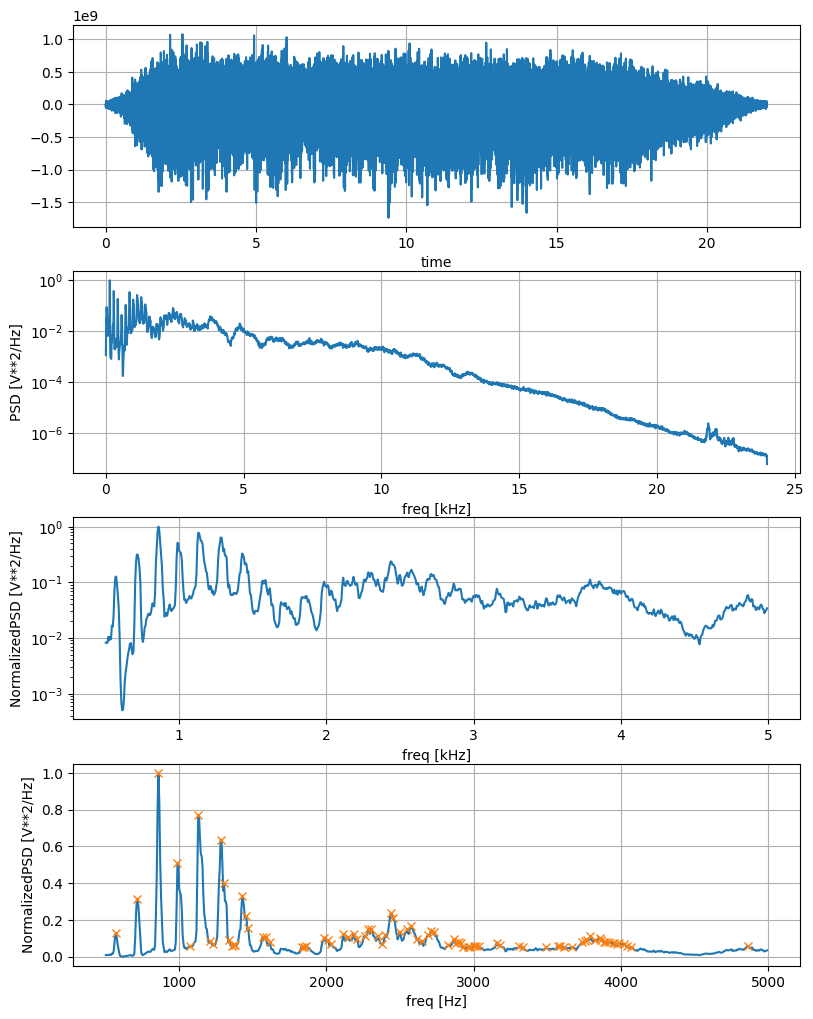

In [22]:
# Now plot the data
plt.figure(1)
fig0, ax = plt.subplots(nrows=4, ncols=1, sharex=False,figsize=(8, 10))
fig0.tight_layout()
y=anech_data
#
ax[0].plot(t, y)
ax[0].grid('on')
ax[0].set_xlabel('time')
#
ax[1].semilogy(f,Pxx_den_norm)
ax[1].grid('on')
ax[1].set_xlabel('freq [kHz]')
ax[1].set_ylabel('PSD [V**2/Hz]')
#
# Now to focus on the region min_freq to max_freq kHz
min_freq=0.5;max_freq=5.0
b=np.where((f> min_freq)&(f<max_freq));barray=np.asarray(b)
first_element=np.min(barray);last_element=np.max(barray)
#
x=Pxx_den[first_element:last_element]
# normallize this section (in contrast to normalizing entire record)
biggest=np.max(x)
x_norm=x/biggest
#
ax[2].semilogy(f[first_element:last_element], x_norm)
ax[2].grid('on')
ax[2].set_xlabel('freq [kHz]')
ax[2].set_ylabel('NormalizedPSD [V**2/Hz]')
#
min_height= 0.05; max_height=1.1
peaks, _ = find_peaks(x_norm, height=(min_height,max_height))
number_of_peaks=len(peaks)
the_freq=f[peaks]*1000+f[first_element]*1000
# ===================================================
# peaks contains the indices of the peaks found; x_norm[peaks] gives the normalized amplitudes of the peaks
# and the_freq=f[peaks]*1000 gives the frequency position (in Hz) of the peaks,
# have to add in +f[first_element]*1000 for the offset 
#
ax[3].plot(f[first_element:last_element]*1000, x_norm)
ax[3].plot(the_freq, x_norm[peaks], "x") # plot(x, y) 
ax[3].grid('on')
ax[3].set_ylabel('NormalizedPSD [V**2/Hz]')
ax[3].set_xlabel('freq [Hz]')
#

# bbox_inches="tight" made sure that the y labels show up
samplerate,anech_data= wavfile.read(the_file_spec) 

In [23]:
print('The sample rate was',samplerate,'samples per second and the sample time was ',"{:.3e}".format(sample_time),'seconds')
print('The number of samples was',len(anech_data),'the record time was',recording_time,'seconds')
print('Frequency resolution =',freq_step*1000, 'Hz')
print('\nThe number of peaks found was',number_of_peaks)
for j in range(0,number_of_peaks):
    corrected_freq=f[peaks[j]]*1000+f[first_element]*1000
    the_peak="{:.3f}".format(corrected_freq) #This is the x position of the peaks (the frequency positio
    print('\t',j,'\t',the_peak,'\t',"{:.2f}".format(x_norm[peaks[j]]))

The sample rate was 48000 samples per second and the sample time was  2.083e-05 seconds
The number of samples was 1072934 the record time was 22 seconds
Frequency resolution = 5.859375 Hz

The number of peaks found was 83
	 0 	 574.219 	 0.13
	 1 	 714.844 	 0.32
	 2 	 861.328 	 1.00
	 3 	 990.234 	 0.51
	 4 	 1072.266 	 0.06
	 5 	 1130.859 	 0.77
	 6 	 1212.891 	 0.09
	 7 	 1230.469 	 0.07
	 8 	 1283.203 	 0.64
	 9 	 1306.641 	 0.40
	 10 	 1341.797 	 0.09
	 11 	 1359.375 	 0.06
	 12 	 1371.094 	 0.06
	 13 	 1382.812 	 0.06
	 14 	 1429.688 	 0.33
	 15 	 1453.125 	 0.22
	 16 	 1470.703 	 0.16
	 17 	 1570.312 	 0.11
	 18 	 1587.891 	 0.11
	 19 	 1617.188 	 0.08
	 20 	 1833.984 	 0.05
	 21 	 1851.562 	 0.05
	 22 	 1863.281 	 0.06
	 23 	 1986.328 	 0.10
	 24 	 2009.766 	 0.09
	 25 	 2033.203 	 0.07
	 26 	 2115.234 	 0.12
	 27 	 2144.531 	 0.11
	 28 	 2185.547 	 0.13
	 29 	 2208.984 	 0.10
	 30 	 2261.719 	 0.11
	 31 	 2285.156 	 0.15
	 32 	 2302.734 	 0.15
	 33 	 2349.609 	 0.11
	 34 	 237

In [662]:
# now to put in Pandas Dataframe 
strength_x=x_norm[peaks]# this is the strength of the peaks
sorted_strength=sorted(strength_x)
#print('\nSorted by strength',sorted_strength[::-1]) # now this is the strength sorted in descending order
the_freq=f[peaks]*1000+f[first_element]*1000
sorted_freq=sorted(the_freq)
#Define a pandasdata frame for the peak strengths and associated positions(freq) 
df_peakset=pd.DataFrame({'Power':strength_x,'freq':the_freq})
df_peakset_power_sorted =df_peakset.sort_values(by ='Power',ascending=False)
print('Listing the top 10 peaks \n',df_peakset_power_sorted[0:10])
# now sort by freq
df_peakset_freq_sorted =df_peakset.sort_values(by ='freq',ascending=True)
print('Listing the top 10 peaks \n',df_peakset_freq_sorted[0:10])

Listing the top 10 peaks 
        Power         freq
2   1.000000   855.468750
0   0.768885   574.218750
1   0.460052   720.703125
3   0.267900  1001.953125
4   0.249313  1142.578125
5   0.171287  1277.343750
10  0.127521  1552.734375
8   0.101352  1447.265625
6   0.098179  1306.640625
7   0.092709  1423.828125
Listing the top 10 peaks 
       Power         freq
0  0.768885   574.218750
1  0.460052   720.703125
2  1.000000   855.468750
3  0.267900  1001.953125
4  0.249313  1142.578125
5  0.171287  1277.343750
6  0.098179  1306.640625
7  0.092709  1423.828125
8  0.101352  1447.265625
9  0.075756  1470.703125


In [663]:
# writing to an Excel spreadsheet
#df1.to_excel("output.xlsx") 
df_peakset_power_sorted.to_excel(the_save_excel_spec)

In [664]:
# Writing out file info
tset_num="{:.3e}".format(sample_time)

line_0 = "The filename is " + the_file
line_1 = "The base path is " + base_path
line_2 = 'The sample rate was ' + str(samplerate) +' samples per second and the sample time was '+tset_num + "seconds"
line_3 = 'The frequency resolution = ' + str(freq_step*1000) + ' Hz'
line_4 = 'The number of samples was ' + str(total_number_samples) +' and the record time was ' + str(recording_time) +' seconds'
line_5 = 'The frequency region from '+ str(min_freq) +'kHz to '+str(max_freq)+ ' kHz was examined for peaks'
line_6 = 'The peak bounds (normalized psd) were ['+str(min_height)+','+str(max_height)+']'
line_7 = "The number of peaks found was "+ str(number_of_peaks)

#
L_text=[line_0,line_1,line_2,line_3,line_4,line_5,line_6,line_7]
textfile = open(the_save_text_spec,"w+") #This will create a file if it doesn't exist in the directory.
mess_length=len(L_text)
for j in range(mess_length):
    print(L_text[j])
    #textfile.write(L_text[j]) # To write inside it:
    textfile.write(f"{L_text[j]}\n")
textfile.close()


The filename is DJIM600-FT-A-2426_20191126.wav
The base path is D:\MMD_2024\WorkBench_2024\DataStores\Acoustic\AnechoicChamber_stuff\audio\
The sample rate was 48000 samples per second and the sample time was 2.083e-05seconds
The frequency resolution = 5.859375 Hz
The number of samples was 1072934 and the record time was 22 seconds
The frequency region from 0.5kHz to 5.0 kHz was examined for peaks
The peak bounds (normalized psd) were [0.05,1.1]
The number of peaks found was 19
